In [9]:
import pandas as pd
import json, re
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
import scipy
from ggplot import *
%matplotlib inline


In [10]:
with open('typing-data.json', 'r') as data_file:   
    data = json.load(data_file)
type_df = json_normalize(data['us:auto']['data'])


In [11]:
cols = type_df.columns.tolist()
cols = cols[83:][::-1] + cols[0:2] + cols[2:83] 
cols = cols[0:7] + cols[76:] + cols[7:76]
type_df = type_df[cols]

cols = type_df.columns.tolist()

for ix, col in enumerate(cols):
  
    if re.match('.*.m$',col):
        ASCI = int(col.split('.')[1].split('.')[0])
        replace = chr(ASCI).upper() if chr(ASCI).upper() != 99 else 'Space'
        cols[ix] = replace + "_missed"
   
    elif re.match('.*.t$',col):
        ASCI = int(col.split('.')[1].split('.')[0])
        replace = chr(ASCI).upper() if chr(ASCI).upper() != 99 else 'Space'
        cols[ix] = replace + "_time"
    
    elif re.match('.*[0-9].h$',col):
        ASCI = int(col.split('.')[1].split('.')[0])
        replace = chr(ASCI).upper() if chr(ASCI).upper() != 99 else 'Space'
        cols[ix] = replace + "_hit" 

cols[7] = 'Space_hit'
cols[8] = 'Space_missed'
cols[9] = 'Space_time'

old_cols = type_df.columns.tolist()
names = dict(zip(old_cols, cols))
type_df.rename(columns=names, inplace=True)
type_df.to_csv('typing-data_formatted.csv', index = False)

In [12]:
print type_df.head.transpose()




,0,1,2,3,4,5,6,7,8,9,...,6368,6369,6370,6371,6372,6373,6374,6375,6376,6377
timeStamp,1.445875e+12,1.445875e+12,1.445875e+12,1.445875e+12,1.445875e+12,1.445875e+12,1.445875e+12,1.445875e+12,1.445875e+12,1.445875e+12,...,1.465052e+12,1.465052e+12,1.465052e+12,1.465052e+12,1.465052e+12,1.465052e+12,1.465052e+12,1.465181e+12,1.465181e+12,1.465181e+12
time,1.461900e+04,1.114100e+04,1.369500e+04,1.385300e+04,1.551800e+04,1.178400e+04,1.391500e+04,1.129900e+04,1.218900e+04,1.276600e+04,...,1.097700e+04,9.619000e+03,1.332700e+04,1.077200e+04,1.287200e+04,1.271200e+04,1.196000e+04,9.394000e+03,1.704400e+04,1.078700e+04
speed,1.929000e+02,2.423480e+02,2.190580e+02,2.165600e+02,1.855910e+02,2.494910e+02,1.983470e+02,2.495800e+02,2.362790e+02,2.302990e+02,...,2.787650e+02,3.181200e+02,2.476180e+02,2.896400e+02,2.330640e+02,2.407170e+02,2.558530e+02,3.257400e+02,1.936170e+02,2.781130e+02
score,2.719890e+02,6.543400e+02,5.111350e+02,5.053060e+02,3.117930e+02,1.711507e+03,6.386780e+02,8.211170e+02,5.292640e+02,3.949630e+02,...,2.274720e+03,2.433621e+03,2.042845e+03,2.259190e+03,1.243008e+03,1.391347e+03,1.391839e+03,4.319310e+03,8.519130e+02,1.529619e+03
length,4.700000e+01,4.500000e+01,5.000000e+01,5.000000e+01,4.800000e+01,4.900000e+01,4.600000e+01,4.700000e+01,4.800000e+01,4.900000e+01,...,5.100000e+01,5.100000e+01,5.500000e+01,5.200000e+01,5.000000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.500000e+01,5.000000e+01
complexity,6.000000e+00,6.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,...,1.600000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.600000e+01,1.700000e+01,1.600000e+01,1.300000e+01,1.600000e+01,1.100000e+01
errors,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00
Space_hit,9.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,8.000000e+00,1.000000e+01,9.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00,...,9.000000e+00,9.000000e+00,1.000000e+01,1.000000e+01,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,8.000000e+00
Space_missed,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Space_time,2.243030e+02,1.672100e+02,2.515640e+02,1.866060e+02,2.210490e+02,1.979120e+02,1.740130e+02,1.906970e+02,2.309640e+02,1.836320e+02,...,1.713330e+02,1.391110e+02,1.630000e+02,1.701000e+02,1.810000e+02,1.783330e+02,2.017780e+02,1.663330e+02,1.903330e+02,1.875000e+02


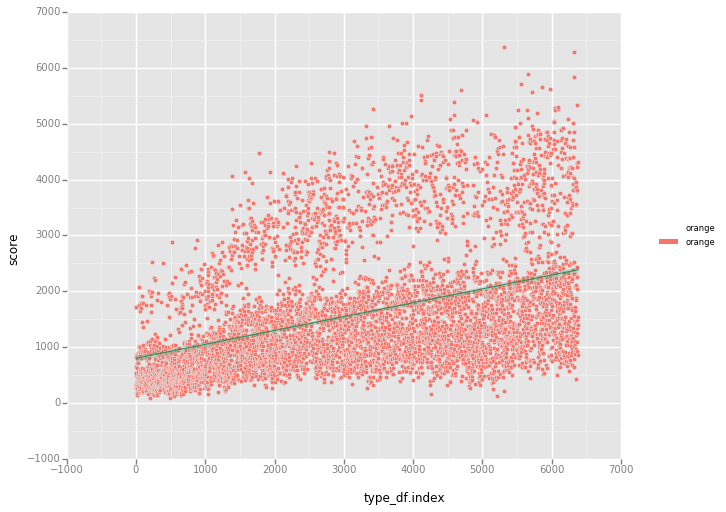

<ggplot: (296603497)>

In [24]:
p = ggplot(type_df, aes(x='type_df.index', y='score', color='orange'))
p + geom_point()
p +  stat_smooth(color='seagreen', thickness='10', span = 0.2)



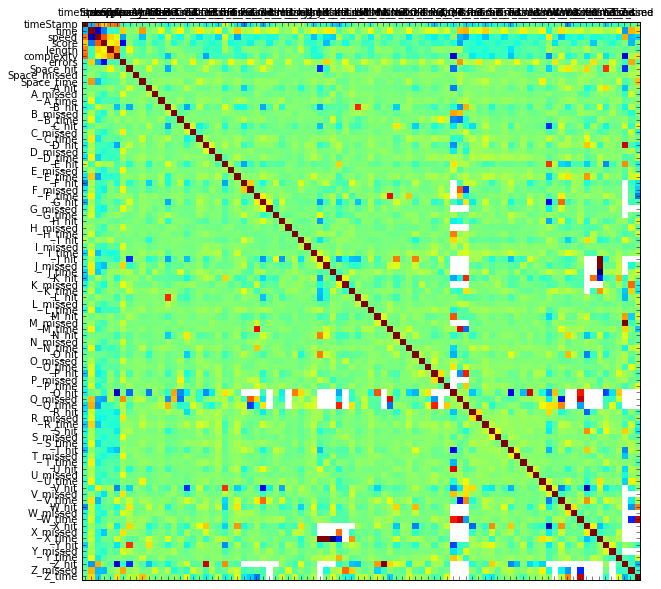

In [30]:
def plot_corr(df,size=15):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(type_df, 10)

In [146]:
def hit_miss(x):    
    return float(x[0]  / (x[0] + x[1]))
   
for ix in range(7, len(type_df.columns), 3):
    
    dft = type_df.ix[:,ix:ix + 2].astype(float)
    hit_miss_rat = dft.apply(hit_miss, axis=1)
    letter = cols[ix].split('_')[0] + '_ratio'
    hit_miss_rat = hit_miss_rat.rename(letter)
    print hit_miss_rat
    print len(hit_miss_rat)
    
    if rat_df is not None:
        pd.concat(rat_df, hit_miss_rat)
    else:
        rat_df =pd.DataFrame(hit_miss_rat)

    

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
5       1.000000
6       1.000000
7       0.909091
8       1.000000
9       1.000000
10      1.000000
11      1.000000
12      1.000000
13      1.000000
14      0.818182
15      1.000000
16      0.750000
17      1.000000
18      1.000000
19      1.000000
20      1.000000
21      1.000000
22      1.000000
23      1.000000
24      1.000000
25      1.000000
26      1.000000
27      1.000000
28      1.000000
29      0.909091
          ...   
6348    1.000000
6349    1.000000
6350    1.000000
6351    0.800000
6352    1.000000
6353    1.000000
6354    1.000000
6355    1.000000
6356    1.000000
6357    1.000000
6358    1.000000
6359    1.000000
6360    1.000000
6361    1.000000
6362    1.000000
6363    1.000000
6364    1.000000
6365    1.000000
6366    1.000000
6367    1.000000
6368    1.000000
6369    1.000000
6370    1.000000
6371    1.000000
6372    1.000000
6373    1.000000
6374    1.000000
6375    1.0000

AttributeError: 'DataFrame' object has no attribute 'concat'

In [142]:
print rat_df

Empty DataFrame
Columns: []
Index: []
